In [3]:
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

import theano_shim as shim
import sinn
from sinn.histories import Spiketrain, Series
import sinn.iotools as io
import sinn.analyze as anlz

import main

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [2]:
spiketrain = Spiketrain.from_raw(io.loadraw("fsgif_1s_spikes_raw.dat"))

In [3]:
anlz.plot(spiketrain)

In [25]:
data = spiketrain._data.get_value()[()]

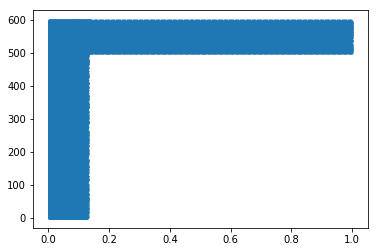

In [63]:
#fig, ax = plt.subplots(figsize=(figwidth, figheight))
    #plt.subplots_adjust(top=1, right=1, bottom=0, left=0)
    
lineheight = 1
markersize = 1
maxN = None
burnin = 0.0

idcs = np.where(spiketrain._tarr[data.row] > burnin)[0]
t_slice = slice(data.row[idcs].argmin(), data.row[idcs].argmax())

plt.scatter(spiketrain._tarr[data.row[idcs]], data.col[idcs]*lineheight, s=markersize)

In [73]:
Atrace = Series(spiketrain, name='A', shape=(1,))
Atrace.set(data.tocsr()[spiketrain.t0idx: spiketrain.t0idx + len(spiketrain)].sum(axis=1).A)

(0, 80)

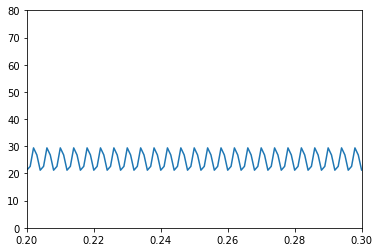

In [81]:
anlz.plot(anlz.smooth(Atrace, 5))

plt.xlim(0.2, 0.3)
plt.ylim(0, 80)

In [92]:
activity_train = Series.from_raw(io.loadraw("fsgif_mf_raw.dat"))

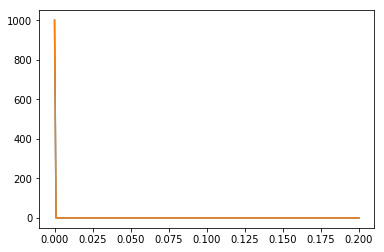

In [93]:
anlz.plot(activity_train)

In [1]:
import main
spikemodel = main.generate_spikes(4, autosave=False)

[monochrome_palette]: value was greater than 1 and was clipped.
Checking for precomputed data...
No precomputed data found. Generating new data...
/home/rene/Recherche/macke_lab/code/theano_shim/theano_shim/core.py:1060: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/rene/Recherche/macke_lab/code/fsGIF/fsgif_model.py:374: RuntimeWarning: overflow encountered in multiply
  for pop_slice, mul_el in zip(pop_slices, multiplier)],
Done.


In [4]:
spikemodel.s._data

<17817x600 sparse matrix of type '<class 'numpy.int8'>'
	with 119499 stored elements in COOrdinate format>

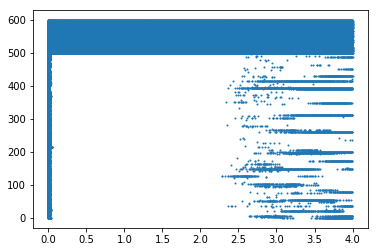

In [12]:
data = spikemodel.s._data
lineheight = 1
markersize = 1
maxN = None
burnin = 0.0

idcs = np.where(spikemodel.s._tarr[data.row] > burnin)[0]
t_slice = slice(data.row[idcs].argmin(), data.row[idcs].argmax())

plt.scatter(spikemodel.s._tarr[data.row[idcs]], data.col[idcs]*lineheight, 
            s=markersize, linestyle='None')

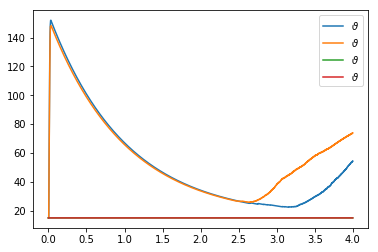

In [7]:
for i in [0, 300, 520, 590]:
    anlz.plot(spikemodel.varθ, component=i)
plt.legend()

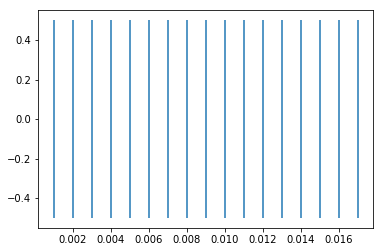

In [43]:
lineheight=1
#for i, idx in enumerate([0, 300, 520, 590]):
for i, idx in enumerate([300]):
    idcs = np.where(np.logical_and(spikemodel.s._tarr[data.row] > burnin,
                                   data.col == idx))[0]
    prop = next(plt.gca()._get_lines.prop_cycler)
    plt.vlines(spikemodel.s._tarr[data.row[idcs]], i-lineheight/2, i+lineheight/2, 
               linestyles='solid', color=prop['color'] )

In [44]:
spikemodel.s.t0idx

6908

In [39]:
spikemodel.s._tarr[np.where(np.logical_and(spikemodel.s._tarr[data.row] > burnin,
                                   data.col == 300))[0]]

array([-6.008, -5.408, -4.808, -4.209, -3.617, -3.038, -2.473, -1.92 ,
       -1.383, -0.87 , -0.385,  0.078,  0.503,  0.892,  1.25 ,  1.572,
        1.865])

(-5, 200)

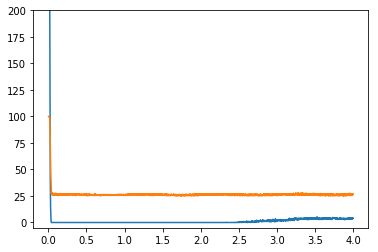

In [15]:
Atrace = Series(spikemodel.s, name='A', shape=(2,))
summedspikes = np.concatenate(
    [ data.tocsr()[spikemodel.s.t0idx: spikemodel.s.t0idx + len(spikemodel.s), pop_slice].sum(axis=1).A
      for pop_slice in spikemodel.s.pop_slices ],
    axis=1)
Atrace.set(summedspikes)
anlz.plot(anlz.smooth(Atrace, 5))
plt.ylim((-5, 200))

In [14]:
data.tocsr()[spikemodel.s.t0idx: spikemodel.s.t0idx + len(spikemodel.s), spikemodel.s.pop_slices[0]].sum(axis=1).A

array([[500],
       [500],
       [500],
       ..., 
       [  4],
       [  5],
       [  3]])

In [45]:
import main
mfmodel = main.generate_activity(4, filename='I-sin.dat')

Checking for precomputed data...
No precomputed data found. Generating new data...
Done.


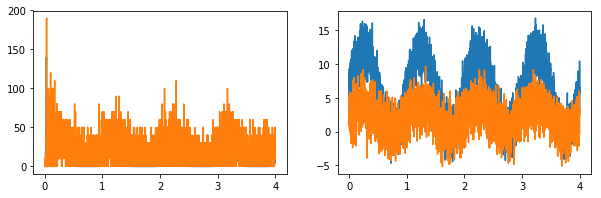

In [14]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
anlz.plot(mfmodel.A)
plt.subplot(1,2,2)
anlz.plot(mfmodel.I_ext)

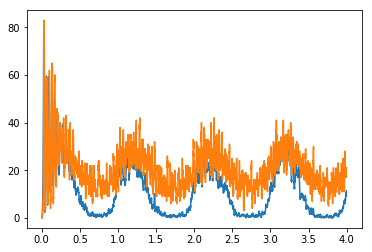

In [15]:
anlz.plot(anlz.smooth(mfmodel.A, 10))

In [7]:
mfmodel.u[0.245:0.25][:,:6]

ShimmedShared([[[ 0.   ,  0.   ],
        [ 1.309,  1.295],
        [ 2.695,  2.564],
        [ 4.019,  3.926],
        [ 5.31 ,  5.057],
        [ 6.418,  5.986]],

       [[ 0.   ,  0.   ],
        [ 1.512,  1.52 ],
        [ 2.757,  2.752],
        [ 4.075,  3.959],
        [ 5.335,  5.255],
        [ 6.563,  6.33 ]],

       [[ 0.   ,  0.   ],
        [ 1.403,  1.231],
        [ 2.841,  2.677],
        [ 4.026,  3.849],
        [ 5.28 ,  4.997],
        [ 6.478,  6.23 ]],

       [[ 0.   ,  0.   ],
        [ 1.472,  1.275],
        [ 2.807,  2.447],
        [ 4.175,  3.822],
        [ 5.302,  4.936],
        [ 6.495,  6.029]],

       [[ 0.   ,  0.   ],
        [ 1.472,  1.09 ],
        [ 2.873,  2.303],
        [ 4.142,  3.417],
        [ 5.443,  4.726],
        [ 6.515,  5.786]]])

In [21]:
mfmodel.varθ[0.245:0.25][:,:6]

ShimmedShared([[[ 15.   ,  15.   ],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [ 15.999,  15.   ]],

       [[ 15.   ,  15.   ],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [ 15.999,  15.   ]],

       [[ 15.   ,  15.   ],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [ 15.999,  15.   ]],

       [[ 15.   ,  15.   ],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [ 15.999,  15.   ]],

       [[ 15.   ,  15.   ],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [    inf,     inf],
        [ 15.999,  15.   ]]])

In [23]:
mfmodel.θ_dis[:][::-1][:10]

ShimmedShared([[ 0.   ,  0.   ],
       [   inf,    inf],
       [   inf,    inf],
       [   inf,    inf],
       [   inf,    inf],
       [ 0.999,  0.   ],
       [ 0.998,  0.   ],
       [ 0.997,  0.   ],
       [ 0.996,  0.   ],
       [ 0.995,  0.   ]])

In [25]:
mfmodel.θ_dis._tarr[-10:]

array([ 2.297,  2.298,  2.299,  2.3  ,  2.301,  2.302,  2.303,  2.304,
        2.305,  2.306])

In [26]:
mfmodel.θ2.memory_time

2.3059999999999596

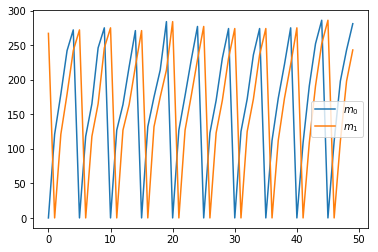

In [18]:
anlz.plot(mfmodel.m[0.2:0.25][:,:6,0], label='m')
plt.legend()

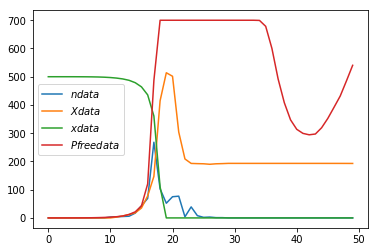

In [9]:
anlz.plot(mfmodel.n[0.0:0.05], component=0)
#anlz.plot(mfmodel.m[0.0:0.05][:,:6,0], label='m')
anlz.plot(mfmodel.X[0.0:0.05], component=0)
anlz.plot(mfmodel.x[0.0:0.05], component=0)
anlz.plot(mfmodel.Pfree[0.0:0.05]*700, component=0, label='Pfree')
#plt.xlim((0, 0.05))
plt.legend()

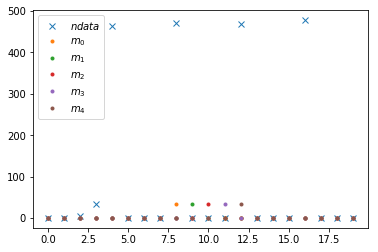

In [19]:
anlz.plot(mfmodel.n[0.02:0.04], component=0, marker='x', linestyle='None')
anlz.plot(mfmodel.m[0.02:0.04][:,4:,0], marker='.', linestyle='None', label='m')
plt.legend()

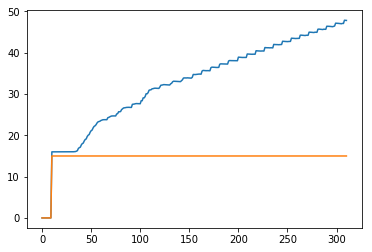

In [5]:
anlz.plot(mfmodel.varθ[:][:,4,:])
#plt.ylim((0,10))K
#plt.legend()

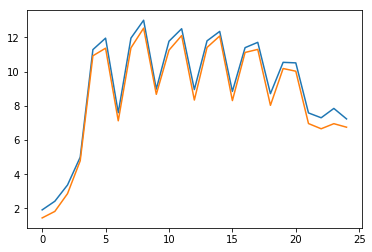

In [6]:
anlz.plot(mfmodel.u[:][15:40:,1,:])

In [27]:
mfmodel.params.u_rest

ShimmedShared([ 20.,  20.])

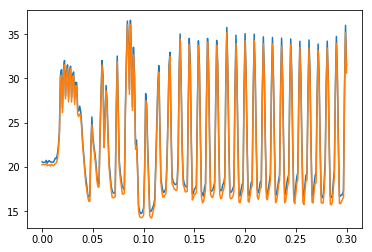

In [7]:
anlz.plot(mfmodel.h_tot)

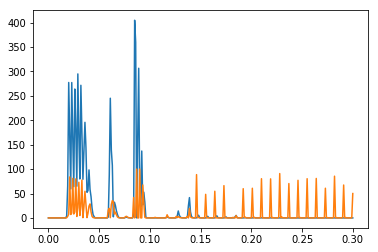

In [8]:
anlz.plot(mfmodel.W)

In [5]:
print(np.concatenate((mfmodel.x[0.012:0.025][:,0:1],
                      mfmodel.X[0.012:0.025][:,0:1],
                      mfmodel.m[0.012:0.025][:,:6,0]),
     axis=1))

[[ 492.14     7.       4.       3.       0.       0.       0.       0.   ]
 [ 487.312   12.       5.       4.       3.       0.       0.       0.   ]
 [ 478.806   18.       6.       5.       4.       3.       0.       0.   ]
 [ 464.049   35.      17.       6.       5.       4.       3.       0.   ]
 [ 435.692   77.999   43.      17.       6.       5.       4.       3.   ]
 [ 360.737  146.996   69.      43.      17.       6.       4.999    3.999]
 [ 109.945  414.972  268.      69.      43.      17.       5.998    4.995]
 [   0.     514.076  103.     268.      69.      43.      16.611    5.613]
 [   0.     503.68    52.     103.     268.      69.      11.627    0.053]
 [   0.     510.884   87.      52.     103.     268.       0.884    0.   ]
 [   0.     513.403  263.      87.      52.     103.       8.403    0.   ]
 [   0.     512.016   69.     263.      87.      52.      41.016    0.   ]
 [   0.     513.448   94.      69.     263.      87.       0.448    0.   ]]


In [26]:
mfmodel.n[0.012:0.025][:,0]

ShimmedShared([   5.,    6.,   17.,   43.,   69.,  268.,  103.,   52.,   75.,
         77.,    4.,   39.,    8.])

In [44]:
mfmodel.X[0.021]

ShimmedShared([ 304.152,   96.936])

In [45]:
mfmodel.W[0.020]

ShimmedShared([ 78.616,   2.478])

In [52]:
((mfmodel.P_λ[0.020])*mfmodel.m[0.020]*mfmodel.ref_mask[:-1]).sum(axis=0)

ShimmedShared([ 78.616,   2.478])

In [6]:
mfmodel.P_λ[0.020][:10]

ShimmedShared([[ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.987,  0.985],
       [ 1.   ,  1.   ],
       [ 1.   ,  1.   ],
       [ 1.   ,  1.   ],
       [ 1.   ,  1.   ],
       [ 1.   ,  1.   ],
       [ 1.   ,  1.   ]])

In [17]:
mfmodel.θ_dis[:10]

ShimmedShared([[   inf,    inf],
       [   inf,    inf],
       [   inf,    inf],
       [ 1.   ,  0.   ],
       [ 0.999,  0.   ],
       [ 0.998,  0.   ],
       [ 0.997,  0.   ],
       [ 0.996,  0.   ],
       [ 0.995,  0.   ],
       [ 0.994,  0.   ]])

In [22]:
for i in range(13):
    print(mfmodel.params.τ_m * mfmodel.params.p * mfmodel.params.N * mfmodel.params.w * mfmodel.A_Δ[0.012:0.025][i])

[[ 12.672  -0.   ]
 [ 12.672  -0.   ]]
[[ 15.84  -12.636]
 [ 15.84  -12.636]]
[[ 19.008  -0.   ]
 [ 19.008  -0.   ]]
[[ 53.856  -0.   ]
 [ 53.856  -0.   ]]
[[ 136.224  -25.272]
 [ 136.224  -25.272]]
[[ 218.592  -25.272]
 [ 218.592  -25.272]]
[[ 849.024  -88.452]
 [ 849.024  -88.452]]
[[  326.304 -1086.696]
 [  326.304 -1086.696]]
[[ 164.736  -37.908]
 [ 164.736  -37.908]]
[[ 275.616  -50.544]
 [ 275.616  -50.544]]
[[ 833.184  -88.452]
 [ 833.184  -88.452]]
[[ 218.592 -808.704]
 [ 218.592 -808.704]]
[[ 297.792 -328.536]
 [ 297.792 -328.536]]


In [13]:
for hist in [mfmodel.h_tot, mfmodel.I_ext, mfmodel.A, mfmodel.W, mfmodel.P_λ, mfmodel.λ, mfmodel.u, mfmodel.varθ]:
    if hasattr(hist, 'name'):
        print(hist.name)
    if len(hist.shape) > 1:
        idx = (slice(None), slice(None, 6), slice(None))
    else:
        idx = (slice(None), slice(None),)
    print(hist[0.012:0.025][idx])

h_tot
[[ 20.752  20.249]
 [ 21.014  20.399]
 [ 20.939  20.469]
 [ 21.445  20.85 ]
 [ 22.397  21.889]
 [ 24.022  23.813]
 [ 30.314  29.953]
 [ 30.985  30.397]
 [ 26.506  26.034]
 [ 26.451  26.206]
 [ 31.336  30.742]
 [ 30.968  30.568]
 [ 26.198  25.731]]
A
[[  10.   10.]
 [  12.    0.]
 [  34.    0.]
 [  86.   20.]
 [ 138.   20.]
 [ 536.   70.]
 [ 206.  860.]
 [ 104.   30.]
 [ 174.   40.]
 [ 526.   70.]
 [ 138.  640.]
 [ 188.  260.]
 [ 146.   40.]]
W
[[   0.       0.   ]
 [   0.       0.   ]
 [   0.       0.   ]
 [   0.001    0.   ]
 [   0.003    0.   ]
 [   0.025    0.002]
 [   3.896    0.31 ]
 [  62.396    3.148]
 [  79.797    2.509]
 [ 260.481    6.789]
 [  70.387   59.944]
 [  92.568   29.294]
 [  87.369    4.003]]
P_λ
[[[ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]]

 [[ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0.   ]]

 [[ 0.     0.   ]
  [ 0.     0.   ]
  [ 0.     0

In [41]:
mfmodel.u[0.05:0.055] - mfmodel.varθ[0.05:0.055]

ShimmedShared([[[ -1.97173183e+01,  -1.50000000e+01],
        [  1.05474384e+01,   1.58341287e+01],
        [ -1.57585071e+03,  -1.57124403e+03],
        [ -1.55821460e+03,  -1.55401731e+03],
        [ -1.53707361e+03,  -1.53339575e+03],
        [ -1.51175489e+03,  -1.50855848e+03],
        [ -2.81633513e+03,  -2.81365411e+03],
        [            -inf,             -inf],
        [            -inf,             -inf],
        [            -inf,             -inf]],

       [[ -1.97126034e+01,  -1.50000000e+01],
        [  3.89013276e+00,   9.33964080e+00],
        [  3.36243495e+01,   3.86699713e+01],
        [ -1.47540430e+03,  -1.47100548e+03],
        [ -1.45862836e+03,  -1.45461891e+03],
        [ -1.43851848e+03,  -1.43500307e+03],
        [ -1.41443462e+03,  -1.41137713e+03],
        [            -inf,             -inf],
        [            -inf,             -inf],
        [            -inf,             -inf]],

       [[ -1.97078931e+01,  -1.50000000e+01],
        [ -9.14453648e

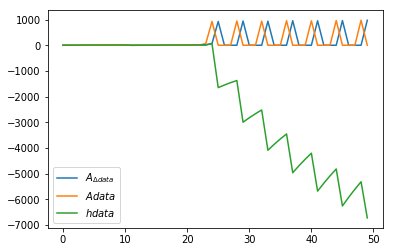

In [6]:
anlz.plot(mfmodel.A_Δ[0.0:0.05], component=[(0, 0)])
anlz.plot(mfmodel.A[0.0:0.05], component=[(0,)])
anlz.plot(mfmodel.h[0.0:0.05], component=0)
plt.legend()

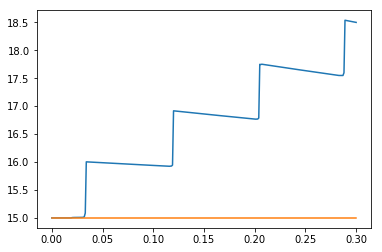

In [14]:
anlz.plot(mfmodel.varθfree)

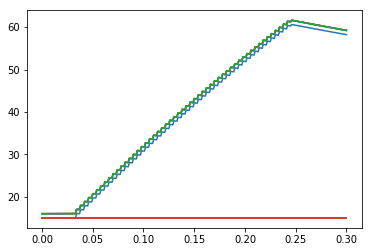

In [7]:
anlz.plot(mfmodel.varθ)

In [11]:
mfmodel.varθ.t0idx

10

In [4]:
mfmodel.θtilde_dis[:]

ShimmedShared([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.00156661,  0.        ],
       [ 0.00156782,  0.        ],
       [ 0.00156903,  0.        ],
       [ 0.00157024,  0.        ],
       [ 0.00157145,  0.        ],
       [ 0.00157266,  0.        ],
       [ 0.004     ,  0.02      ],
       [ 0.004     ,  0.02      ],
       [ 0.004     ,  0.02      ],
       [ 0.004     ,  0.02      ],
       [ 0.004     ,  0.02      ]])

In [51]:
mfmodel.θ2.eval(0.01)

array([ 0.99401796,  0.        ])

In [48]:
mfmodel.params.t_ref

ShimmedShared([ 0.004,  0.004])

In [17]:
shim.concatenate([(y[i] * shim.ones((N[i],), dtype='float64')).shape.eval({x: xval})  for i in range(3)])#.shape.eval({x: xval}) 

array([4, 2, 3])